In [1]:
!pip install pydicom
import pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.5 MB/s eta 0:00:00


In [2]:
ds1 = pydicom.read_file('/content/sample_data/1-01.dcm')
ds2 = pydicom.read_file('/content/sample_data/1-02.dcm')
ds3 = pydicom.read_file('/content/sample_data/1-03.dcm')

In [3]:
import matplotlib.pyplot as plt


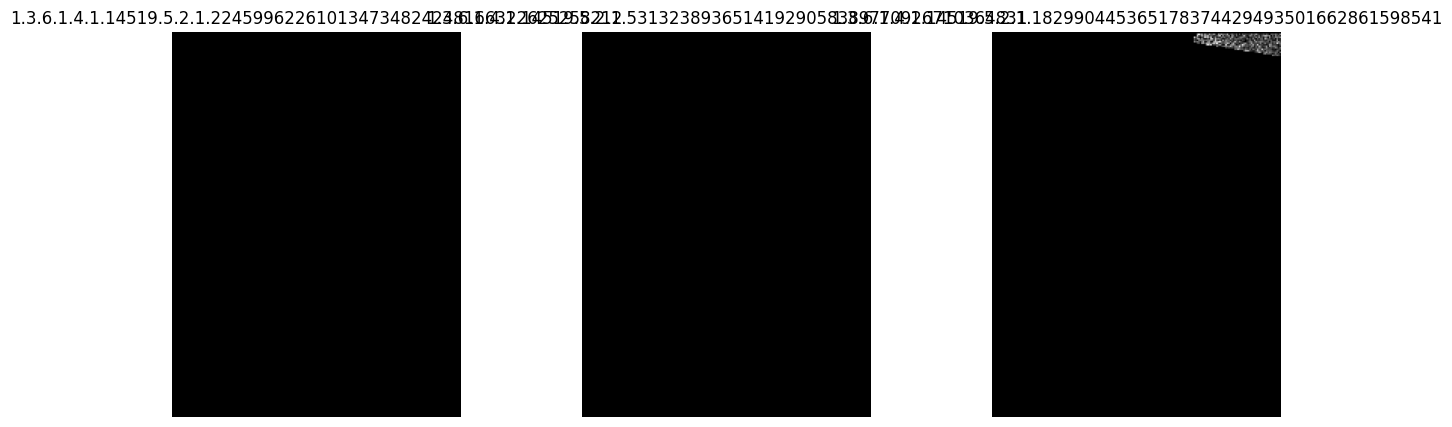

In [12]:
# Load DICOM files
filePaths = ["/content/sample_data/1-01.dcm", "/content/sample_data/1-02.dcm", "/content/sample_data/1-03.dcm"]
dicomImages = [pydicom.dcmread(path) for path in filePaths]

# Plot the images
fig, axes = plt.subplots(1, len(filePaths), figsize = (15,5)) # something might be wrong here

for ax, dicomImage in zip(axes, dicomImages):
    ax.imshow(dicomImage.pixel_array, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(dicomImage.SOPInstanceUID)

plt.show()


In [13]:
!pip install opencv-python-headless

In [14]:
import pydicom
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
# Function to load and preprocess a single DICOM image
def loadDicomImage(dicomFilePath, imageSize):
    dicomImage = pydicom.dcmread(dicomFilePath)
    image = dicomImage.pixel_array
    imageResized = cv2.resize(image, (imageSize, imageSize))
    imageNormalized = imageResized / np.max(imageResized)
    return imageNormalized

In [21]:
# Example lists of DICOM file paths and their labels (0 for no tumor 1 for tumor)
trainFiles = ["/content/sample_data/1-01.dcm", "/content/sample_data/1-02.dcm", "/content/sample_data/1-03.dcm"]
trainLabels = [0, 1, 0] # example labels correpsonding to the train files
valFiles = ["/content/sample_data/1-01.dcm", "/content/sample_data/1-02.dcm"]
valLabels = [0, 1] # example labels correpsonding to the val files

# Function to load and preprocess a list of DICOM files
def loadDicomFiles(filePaths, labels, imageSize):
    images = []
    for filePath in filePaths:
        image = loadDicomImage(filePath, imageSize)
        images.append(image)
    images = np.array(images).reshape(-1, imageSize, imageSize, 1)
    labels = np.array(labels)
    return images, labels

imgSize = 224
xTrain, yTrain = loadDicomFiles(trainFiles, trainLabels, imgSize)
xVal, yVal = loadDicomFiles(valFiles, valLabels, imgSize)

<ipython-input-20-660f1b507da4>:6: RuntimeWarning: invalid value encountered in divide
  imageNormalized = imageResized / np.max(imageResized)


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
# Data augmentation
trainDatagen = ImageDataGenerator(rotation_range = 20, width_shift_range = 0.2, height_shift_range=0.2, zoom_range = 0.2, horizontal_flip = True)
valDatagen = ImageDataGenerator()

trainGenerator = trainDatagen.flow(xTrain, yTrain, batch_size = 32)
valGenerator = valDatagen.flow(xVal, yVal, batch_size = 32)

In [25]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (imgSize, imgSize, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the model
history = model.fit(trainGenerator, epochs = 20, validation_data = valGenerator)

# Save the trained model
model.save('tumorDetectionModel.h5')

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step - accuracy: 0.6667 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/s

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Make predictions of the validation set
yPredProb = model.predict(xVal)
yPred = (yPredProb > 0.5).astype(int)

# Check for NaN values in yPredProb and yval
if np.isnan(yPredProb).any():
  print("NaN vals found in yPredProb. Replacing NaNs with 0.")
  yPredProb = np.nan_to_num(yPredProb)
if np.isnan(yVal).any():
  print("NaN vals found in yVal. Replacing NaNs with 0.")
  yVal = np.nan_to_num(yVal)

# Calculate metrics
accuracy = accuracy_score(yVal, yPred)
precision = precision_score(yVal, yPred)
recall = recall_score(yVal, yPred)
f1 = f1_score(yVal, yPred)

# Print metrics
print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1 * 100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
NaN vals found in yPredProb. Replacing NaNs with 0.
Accuracy: 50.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


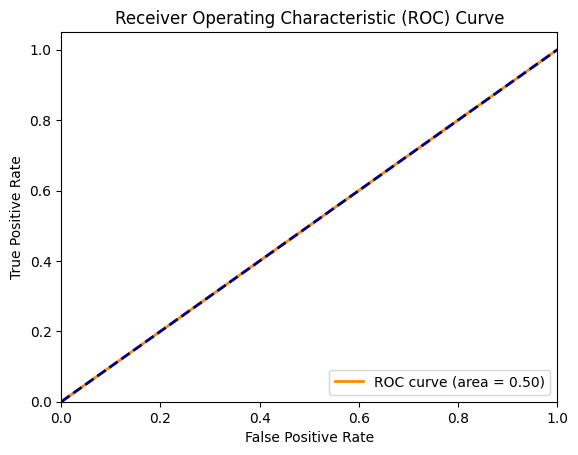

In [37]:
# Plot ROC curve and calculate AUC
fpr, tpr, _ = roc_curve(yVal, yPredProb)
rocAuc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {rocAuc:.2f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()

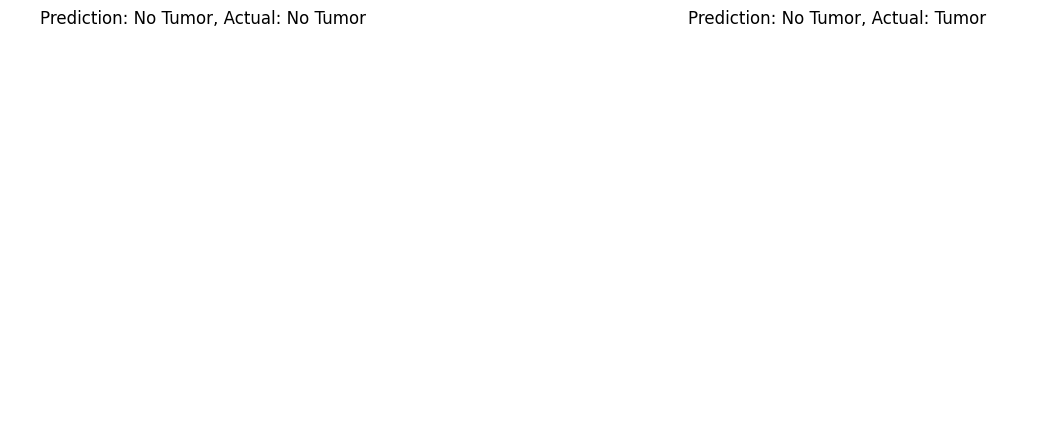

In [39]:
# Visualizatio nof the predictions
fig, axes = plt.subplots(1, len(xVal), figsize = (15,5))
for i, ax in enumerate(axes):
    ax.imshow(xVal[i].reshape(imgSize, imgSize), cmap = 'gray')
    predictionText = 'Tumor' if yPred[i] == 1 else 'No Tumor'
    trueLabelText = 'Tumor' if yVal[i] == 1 else 'No Tumor'
    ax.set_title(f'Prediction: {predictionText}, Actual: {trueLabelText}')
    ax.axis('off')
plt.show()